In [1]:
import numpy as np
import sys
sys.path.append('../')
import base
import path_analysis
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
root_paths = ['../../Data/Raw/FS10/BPositions_FS10_20211006-154014/', '../../Data/Raw/FS10/BPositions_FS10_20211007-150456/',\
             '../../Data/Raw/FS10/BPositions_FS10_20211011-094820/', '../../Data/Raw/FS10/BPositions_FS10_20211014-160224/']
tags = ['20211006-154014','20211007-150456', '20211011-094820', '20211014-160224']
data = base.MultiDaysBeaconPosition(root_paths, tags, has_beacon = True, has_metadata = True)

../base.py:33: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  metadata = pd.read_csv(p, sep=" : ", header=None, index_col=0).T


In [3]:
straightness_moment = path_analysis.straightness_moment_time(data.trial_list[0][1][:,:3], before_time=2)
straightness_time = path_analysis.straightness_over_time(data.trial_list[0][1][:,:3], before_time=2)

Ratio: 0.6403141101713364


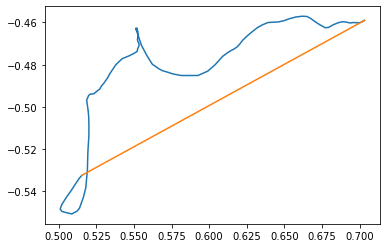

In [4]:
plt.plot(straightness_moment[2][:,0], straightness_moment[2][:,1])
plt.plot(straightness_moment[1][:,0], straightness_moment[1][:,1])
print(f'Ratio: {straightness_moment[0]}')

../path_analysis.py:76: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
../path_analysis.py:76: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)


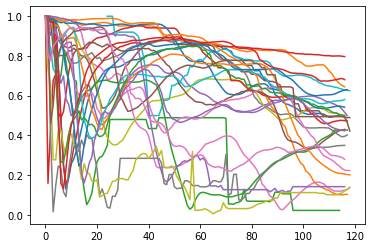

In [6]:
for i in range(len(data.trial_list[0])):
    straightness_moment = path_analysis.straightness_moment_time(data.trial_list[0][i][:,:3], before_time=2)
    straightness_time = path_analysis.straightness_over_time(data.trial_list[0][i][:,:3], before_time=2)
    if data.trial_visible[0][i]:
        plt.plot(straightness_time[0])
    else:
        plt.plot(straightness_time[0],c='cyan')

In [4]:
bootstrap_sliding_window=path_analysis.bootstrap(data.trial_list[0][0], num_sampling=10, time_window=2, straightness_type = 'sliding')

../path_analysis.py:76: RuntimeWarning: invalid value encountered in double_scalars
  straightness.append(straight_length / trajectory_displacement)
